# 1. Exploratory Data Analysis (EDA) - Glute Bridge

**Objective:** Load the raw glute bridge landmark dataset, understand its structure, check for missing values, analyze the distribution of labels and key landmark coordinates, and identify important features for the exercise.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

## 1.1 Load Data

In [9]:
BASE_DATA_PATH = "../data/"
TRAIN_DATA_PATH = os.path.join(BASE_DATA_PATH, "train.csv")
TEST_DATA_PATH = os.path.join(BASE_DATA_PATH, "test.csv")

try:
    df_train_raw = pd.read_csv(TRAIN_DATA_PATH)
    df_test_raw = pd.read_csv(TEST_DATA_PATH)
    print("Train and Test datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure train.csv and test.csv are in the '{BASE_DATA_PATH}' directory.")
    # Create empty dataframes to avoid errors in subsequent cells
    df_train_raw = pd.DataFrame()
    df_test_raw = pd.DataFrame()

Train and Test datasets loaded successfully.


## 1.2 Initial Data Inspection

In [10]:
if not df_train_raw.empty:
    print("--- Training Data ---")
    print(f"Shape: {df_train_raw.shape}")
    print("\nFirst 5 rows:")
    display(df_train_raw.head())
    print("\nInfo:")
    # Limit info output for very wide dataframes
    df_train_raw.info(max_cols=10, verbose=True)
    print("\nDescriptive Statistics (Sample of coordinate columns):")
    coord_cols_sample = [col for col in df_train_raw.columns if '_x' in col or '_y' in col]
    display(df_train_raw[coord_cols_sample[:8]].describe().T)
else:
    print("Training data is empty or not loaded.")

--- Training Data ---
Shape: (159, 100)

First 5 rows:


,label,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,glute_bridge_down,71.57093,157.70874,-1.791360,61.074837,163.16237,5.740292,61.05513,163.70825,5.646257,...,127.447010,407.732820,223.73878,-27.005392,440.231720,205.85239,115.739220,459.190200,220.59335,-47.47098
1,glute_bridge_up,1492.81240,1213.30300,144.868120,1516.372100,1231.00180,94.321594,1516.66920,1237.81640,94.452320,...,-95.606050,589.710940,1312.39980,525.573200,421.232240,1400.98030,-129.425830,420.242000,1328.73860,444.76220
2,glute_bridge_down,381.78620,172.25400,19.242450,391.689880,180.40102,2.406886,391.82343,182.61970,2.397456,...,-38.317757,82.316605,223.90344,117.696594,7.011813,243.68057,-45.651737,27.719206,225.36635,113.18036
3,glute_bridge_down,371.02954,142.32365,22.007988,377.520360,148.40544,8.701687,377.38528,149.75993,8.683881,...,-11.382127,110.120705,165.96872,126.139720,61.052544,172.36755,-9.363439,61.398907,164.31009,116.99630
4,glute_bridge_up,1022.66900,297.81638,74.103195,1038.971200,307.30923,52.543180,1040.23340,311.36362,52.464390,...,-48.231754,439.872600,413.29266,209.106540,348.434880,498.15280,-79.533270,341.145600,408.05606,176.16118



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 100 columns):
 #   Column              Dtype  
---  ------              -----  
 0   label               object 
 1   nose_x              float64
 2   nose_y              float64
 3   nose_z              float64
 4   left_eye_inner_x    float64
 5   left_eye_inner_y    float64
 6   left_eye_inner_z    float64
 7   left_eye_x          float64
 8   left_eye_y          float64
 9   left_eye_z          float64
 10  left_eye_outer_x    float64
 11  left_eye_outer_y    float64
 12  left_eye_outer_z    float64
 13  right_eye_inner_x   float64
 14  right_eye_inner_y   float64
 15  right_eye_inner_z   float64
 16  right_eye_x         float64
 17  right_eye_y         float64
 18  right_eye_z         float64
 19  right_eye_outer_x   float64
 20  right_eye_outer_y   float64
 21  right_eye_outer_z   float64
 22  left_ear_x          float64
 23  left_ear_y          float64
 24  left_ear_z          floa

,count,mean,std,min,25%,50%,75%,max
nose_x,159.0,483.507240,420.162147,43.291050,203.010785,347.70320,926.725475,3160.8606
nose_y,159.0,274.429871,148.132032,69.290565,179.030330,256.35693,310.419265,1213.3030
left_eye_inner_x,159.0,484.402485,434.063214,39.327892,183.276480,343.31827,944.636385,3227.4863
left_eye_inner_y,159.0,283.395288,150.449731,75.548330,186.767200,263.65277,324.422610,1231.0018
left_eye_x,159.0,484.755819,434.411295,39.472805,183.050765,343.38270,946.621225,3229.3389
left_eye_y,159.0,285.360325,151.214489,76.782790,187.762530,267.86234,328.833415,1237.8164
left_eye_outer_x,159.0,485.140892,434.762699,39.631046,183.004060,343.50910,948.758300,3231.2917
left_eye_outer_y,159.0,287.610462,152.086465,78.169846,188.096640,272.46050,331.790145,1245.3618


## 1.3 Missing Value Analysis

In [11]:
if not df_train_raw.empty:
    print("Missing values in Training Data:")
    missing_train = df_train_raw.isnull().sum()
    missing_train = missing_train[missing_train > 0]
    if not missing_train.empty:
        print(f"Found {len(missing_train)} columns with missing values.")
        plt.figure(figsize=(12, 8))
        missing_train.sort_values().plot(kind='barh')
        plt.title('Missing Values in Training Data (Columns with NaNs)')
        plt.xlabel('Number of Missing Values')
        plt.show()
    else:
        print("No missing values found in training data.")

Missing values in Training Data:
No missing values found in training data.


**Observation on Missing Values:** Missing landmark coordinates typically occur when MediaPipe fails to detect a specific body part due to occlusion, poor lighting, or the person being partially out of frame. The feature engineering step will need to handle these `NaN` values gracefully.

## 1.4 Label Distribution

Label Distribution in Training Data:
label
glute_bridge_down    81
glute_bridge_up      78
Name: count, dtype: int64


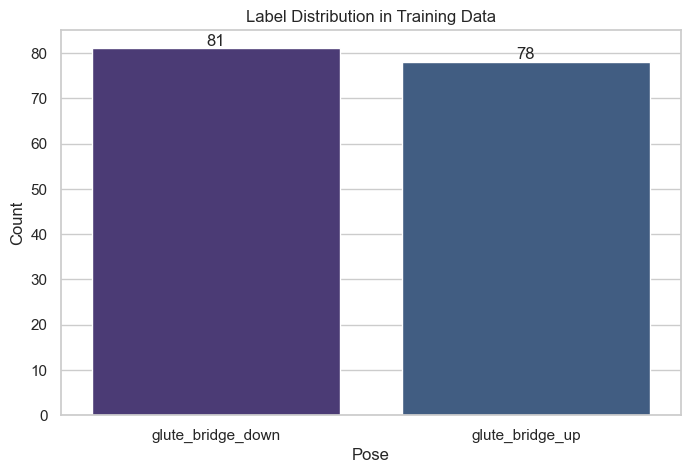

In [12]:
if not df_train_raw.empty and 'label' in df_train_raw.columns:
    print("Label Distribution in Training Data:")
    print(df_train_raw['label'].value_counts())
    
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x='label', data=df_train_raw, order=df_train_raw['label'].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title('Label Distribution in Training Data')
    plt.ylabel('Count')
    plt.xlabel('Pose')
    plt.show()
else:
    print("Label column not found or training data empty.")

**Observation on Label Distribution:** A balanced dataset between `glute_bridge_down` and `glute_bridge_up` is ideal for training a robust classifier. If there is a significant imbalance, techniques like class weighting or stratified sampling (which we will use) become important.

## 1.5 Landmark Coordinate Distributions for Key Body Parts

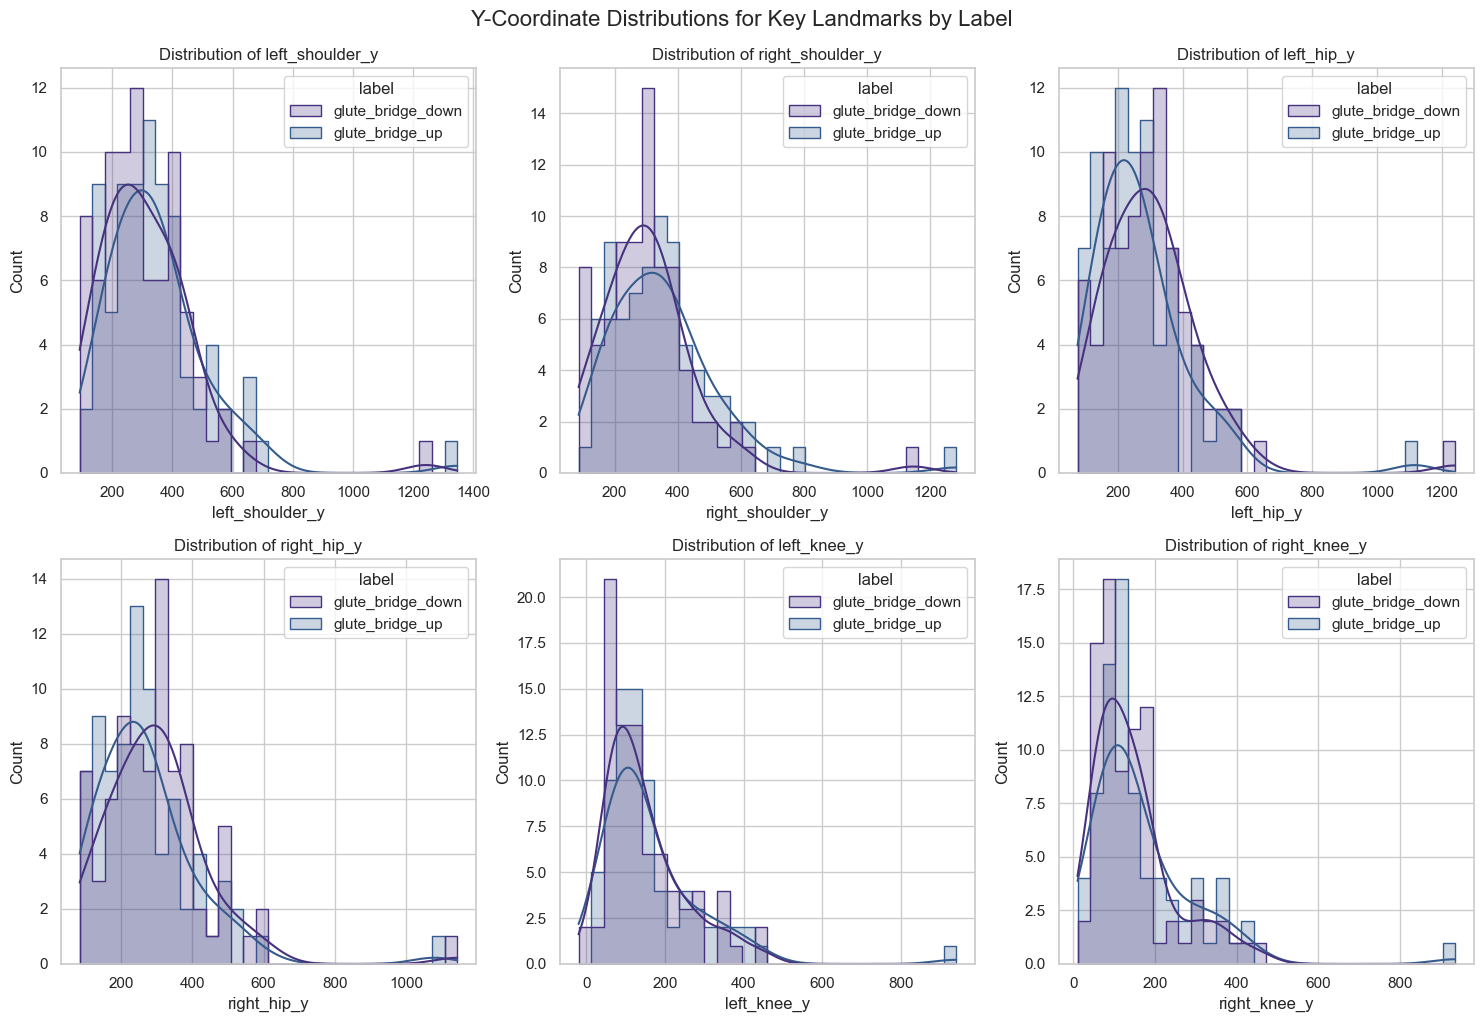

In [13]:
if not df_train_raw.empty:
    key_landmarks_y = ['left_shoulder_y', 'right_shoulder_y', 'left_hip_y', 'right_hip_y', 'left_knee_y', 'right_knee_y']
    
    # Ensure columns exist before plotting
    plot_cols = [col for col in key_landmarks_y if col in df_train_raw.columns]
    
    if plot_cols:
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(plot_cols):
            plt.subplot(2, 3, i + 1)
            sns.histplot(data=df_train_raw, x=col, hue='label', kde=True, bins=30, element="step")
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.suptitle('Y-Coordinate Distributions for Key Landmarks by Label', y=1.02, fontsize=16)
        plt.show()
    else:
        print("Key landmark columns for Y-coordinate distribution plot not found.")

**Observation on Landmark Distributions:**
- The `_y` coordinates are crucial for the glute bridge. We expect a significant difference in the `hip_y` coordinates between the `up` and `down` states.
- In the `up` state, the `hip_y` value should be smaller (higher up in the image frame) and closer to the `shoulder_y` and `knee_y` values, indicating a straight line.
- In the `down` state, `hip_y` should be larger (lower in the frame).

## 1.6 Visualizing Key Relationships

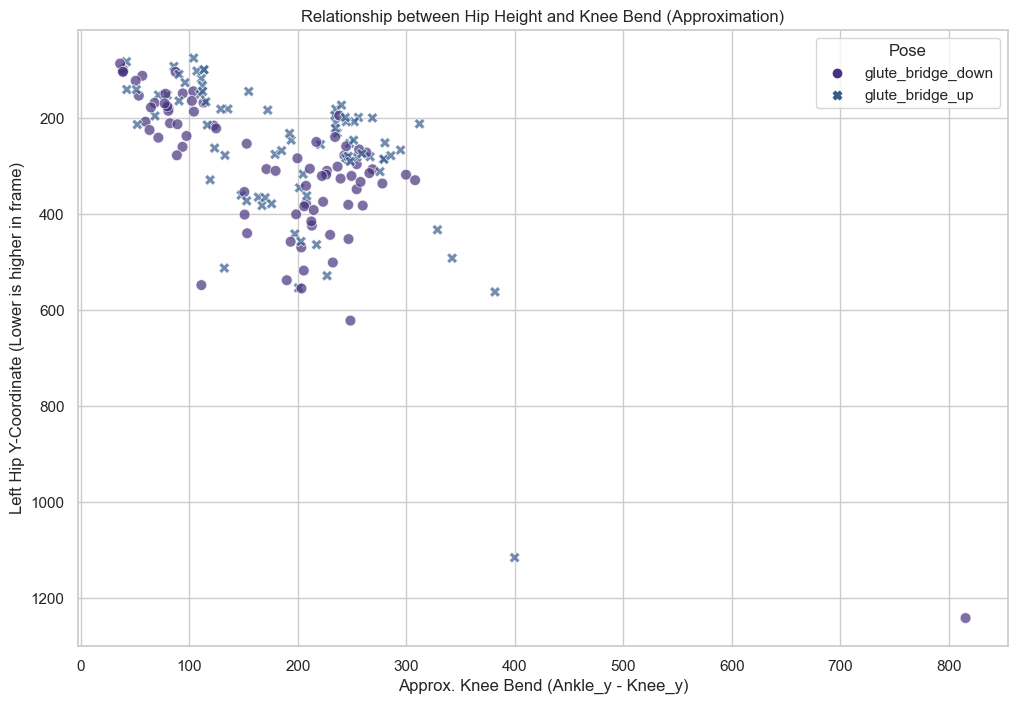

In [14]:
if not df_train_raw.empty and all(c in df_train_raw.columns for c in ['left_hip_y', 'left_knee_y', 'left_ankle_y', 'label']):
    temp_df = df_train_raw.copy()
    
    temp_df['approx_knee_bend_y'] = temp_df['left_ankle_y'] - temp_df['left_knee_y']

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=temp_df.sample(min(1000, len(temp_df))), x='approx_knee_bend_y', y='left_hip_y', hue='label', style='label', s=60, alpha=0.7)
    plt.title('Relationship between Hip Height and Knee Bend (Approximation)')
    plt.xlabel('Approx. Knee Bend (Ankle_y - Knee_y)')
    plt.ylabel('Left Hip Y-Coordinate (Lower is higher in frame)')
    plt.gca().invert_yaxis() # Invert y-axis to match image coordinates
    plt.legend(title='Pose')
    plt.show()
else:
    print("Required columns for relationship plot not found.")

## 1.7 EDA Summary & Next Steps

This exploration confirms that our dataset contains the necessary landmark data to differentiate between the 'up' and 'down' phases of a glute bridge. The key differentiators will likely be features derived from the vertical positions of the hips, shoulders, and knees.

**Next Steps (in `2_data_preprocessing_and_model_training.ipynb`):**
1.  **Data Augmentation:** Since the dataset is small, we will create new training samples by applying noise, scaling, and rotation to the existing landmark data.
2.  **Feature Engineering:** Systematically extract meaningful geometric features (angles, distances, deviations) from the raw and augmented landmark data using `GeometryUtils`.
3.  **Model Training:** Train a variety of classification models within a scikit-learn `Pipeline` that includes feature scaling.
4.  **Evaluation:** Evaluate the models using stratified cross-validation on the training set and then perform a final evaluation on the held-out test set.
5.  **Model Saving:** Save the best performing model pipeline as a `.pkl` file for inference and deployment.